# Paper math
> Sanity checking all derivations for the manuscript

In [1]:
# np, pd, plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(plt.matplotlib.matplotlib_fname())

import aptr


/home/phil/aptr/notebooks/paper/matplotlibrc


In [2]:
db = aptr.database.RnaDB()

0.9992494370778083 sequences remain after trimming
0.6346009507130348 sequences remain after filtering


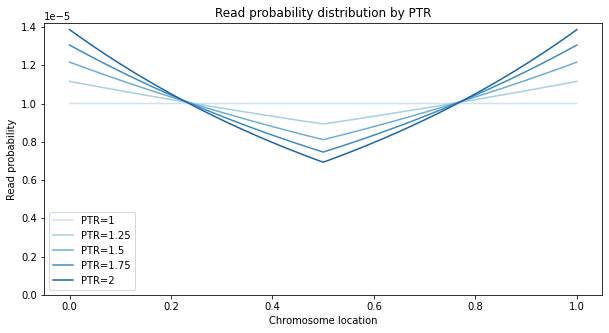

In [13]:
# Figure to show probability density functions of PTR

from aptr.simulation_new import _exact_coverage_curve

x = np.linspace(0, 1, 100000)
dists = aptr.oor_distance(x)

fig = plt.figure(figsize=(10, 5))
# Shades of blue
colors = plt.cm.Blues(np.linspace(0.2, 0.8, 5))
for ptr, color in zip([1, 1.25, 1.5, 1.75, 2], colors):
    y = _exact_coverage_curve(log2_ptr=np.log2(ptr), distances=dists)
    y /= np.sum(y)
    plt.plot(x, y[0,:], label=f"PTR={ptr}", color=color)
plt.ylim(0, plt.ylim()[1])
plt.xlabel("Chromosome location")
plt.ylabel("Read probability")
plt.title("Read probability distribution by PTR")
plt.legend()
plt.show()

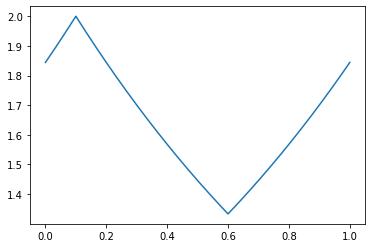

In [16]:
# Verify math

# Declare variables
abundance = 10
ptr = 1.5
logptr = np.log2(ptr)
oor = 0.1
size = 100000
x = np.linspace(0, 1, size)
dists = aptr.oor_distance(x, oor=oor, size=1)

# coverage functions
y = _exact_coverage_curve(log2_ptr=logptr, distances=dists)
plt.plot(x, y.flatten())

1.4999939179748885


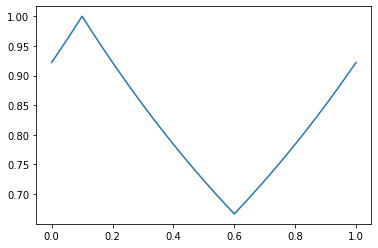

In [48]:
deltas = dists / 2 # Denormalize

y2 = np.exp2(1 - logptr * 2 * deltas)
assert np.allclose(y, y2)

y3 = np.exp2(1 - logptr * 2 * deltas)
assert np.allclose(y, y3)

y4 = 

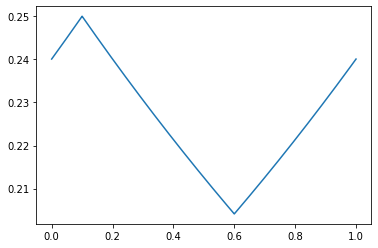

In [44]:
plt.plot(x, y3.flatten())

In [46]:
np.exp2(1)

2.0